<a href="https://colab.research.google.com/github/anuradha-datascience/machine-learning/blob/main/MachineLearningforBeginners_Part_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a hands-on learning approach where I will not be overwhelming you with standalone concepts of mathsor visualization libraries or numpy.We will be simply using them as and when the need is there and that will help you to grasp the actual implementation with sound *concepts*

# Machine Learning - **Topics**

1. Introduction - ML, Types,SL,UL, Regression , Classification

What will be the approach to learn

Maths ?

Python ?

2. Weight , Bias , Feature(Slope, intercept, target and independent variable)

3. Linear Regression Problem - Supervised Learning Regression Problem

4. Error - Predicted Vs Tested Value

5. A little maths on derivative

7. Gradient Descent and Cost Function

8. Logistic Regression - Solving Supervised Learning Classification problem

9. Performance Evaluation




# Machine Learning - Introduction

# Features, Weights and Bias


Let's solve a basic maths problem:
suppose you go to supermarket one day and find the melons of different sizes and weights

melon_data = [(1, 2), (2, 4), (3, 6),(4, 8), (5, 10]

melon_price=2*melon_wt

let's say  you need to pay parking of the place as $2 weather you buy or not


melon_price=2*melon_wt+2

If I ask you the price of melon weighted 20 kg, you will substitute in equation:

melon_price_20=2*20+2

We can also draw a graph with and without parking .We can predict value from the line.








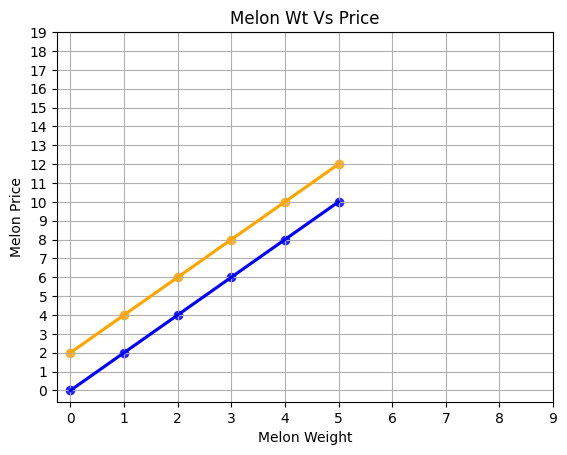

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample list of tuples containing coordinates
coordinates1 = [(0,0),(1, 2), (2, 4), (3, 6), (4, 8), (5, 10)]
#with bias
coordinates2 = [(0,2),(1, 4), (2, 6), (3, 8), (4, 10), (5, 12)]


# Extract x and y coordinates from the list of tuples
x_values_1 = [coord[0] for coord in coordinates1]
y_values_1 = [coord[1] for coord in coordinates1]

# Extract x and y coordinates from the list of tuples
x_values_2 = [coord[0] for coord in coordinates2]
y_values_2 = [coord[1] for coord in coordinates2]

# Plot the points
sns.regplot(x=x_values_1,y= y_values_1,color='blue')

# Plot the points
sns.regplot(x=x_values_2,y= y_values_2,color='orange')


# Add labels and title
# Customize x-ticks to display integers
plt.xticks(range(min(x_values_1), max(x_values_1)+5))
plt.yticks(range(min(y_values_1), max(y_values_1)+10))

# Add labels and title
plt.xlabel('Melon Weight')
plt.ylabel('Melon Price')
plt.title('Melon Wt Vs Price')
# Show the plot
plt.grid(True)
plt.show()

#annotate line with eqaution while describing

[Inspiration: Towards Data Science](https://towardsdatascience.com/machine-learning-simple-linear-regression-with-python-f04ecfdadc13)

Linear equation in general be written as

y=mx+b

m-> slope or weight

b-> bias

x, y are variables are

when we are using it for machine learning, y is dependent variable(dependent on x in this case like melon price is dependendent on melon weight) or predicted variable or label or target variable or the variable
x is independent variable or feature


This can also be interpretedvas simple linear regression model where we can predic value of with help of value of x



**When life is not that straightforward**

Suppose we want to predict the salary of an employee based on their years of experience. In this case, the independent variable is “years of experience” and the dependent variable is “salary”. We have a dataset that contains the salaries of 35 employees along with their years of experience.

Now you are a hiring manager and you have a candidate 7.7 years of experience, what salary you could offer based on dataset provided

 Our task is to build a model that can predict the salary of a new employee based on their years of experience.



[Salary Data Set](https://www.kaggle.com/code/codebreaker619/employee-salary-prediction-using-linear-regression/input)






In [91]:
import pandas as pd

# Convert dictionary to DataFrame
df = pd.read_csv("Salary.csv")

# Display the DataFrame
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


Based on our observation, we can guess that the salary range of 5 Years Experience should be in the particular range. Of course, we can offer to our candidate any number in that red range. But how to pick the best number for him? It’s time to use Machine Learning to predict the best salary for our candidate.

*The goal of creating a model is to choose parameters, or theta values, so that y^ is close to y for the training data, x and y. *

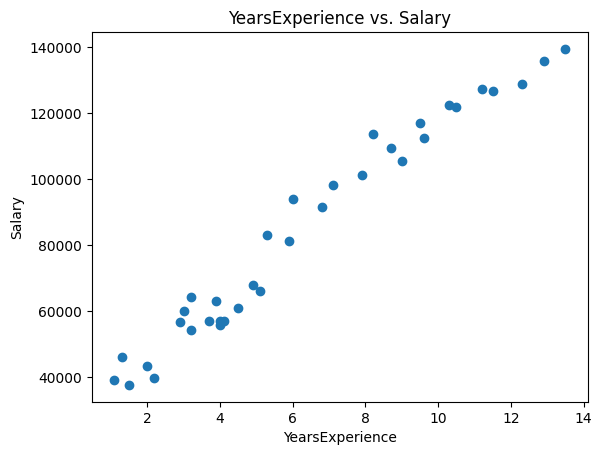

In [93]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(df["YearsExperience"], df["Salary"])

#set labels
plt.title('YearsExperience vs. Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

# Set y-axis tick formatter to disable scientific notation
plt.ticklabel_format(style='plain', axis='y')

#show plot
plt.show()

In [94]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df.iloc[:, :-1].values #get a copy of dataset exclude last column
y = df.iloc[:, 1].values #get array of dataset in column 1st
#input features need to be in 2-D shappe
X.shape




(35, 1)

In [95]:
#training the model - we will talk about what is actually training the model later
model.fit(X, y)


LinearRegression()

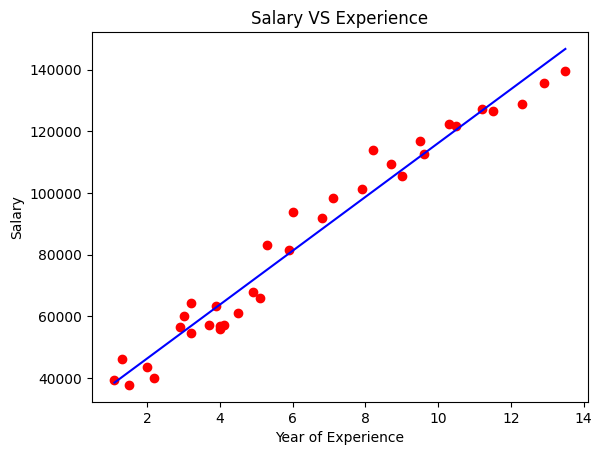

In [96]:
# Visualizing the Training set results

plt.scatter(X, y, color='red')
plt.plot(X, model.predict(X), color='blue')
plt.title('Salary VS Experience')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

In [97]:
# Extract the coefficients
m = model.coef_[0]  # Slope
b = model.intercept_  # Intercept

print("Slope (m):", m)
print("Intercept (b):", b)

Slope (m): 8731.941047062497
Intercept (b): 28859.52619453144


In [98]:
import numpy as np
X_pred = np.array([[7.7]])

# Make predictions
prediction = model.predict(X_pred)
prediction
#check value by replacing y=mx+b using above slope and intercept

array([96095.47225691])

But should we blindly trust this predictive model .Ofcourse we need a validation that this is the "Best fit Line" with given slope and intercept.

We feel the need of a test data where we know actual values of target feature and then after prediction from given test inputs , we compare the values.

So from where we get the test data.

Earlier we used whole of the dataset to train the model and we are not left with any test data.

This time we will divide given data into 2 parts - bigger chunk we will keep for "training the model" which will give us "best fit line" and smaller chunk we can keep as test data to validate how close are the actual values to predicted values

Though you might have got intution by now what is "training the model" and what is "best fit line", we will talk about it in details in upcoming parts.

So let's for now divide our datset into train and test data .How do we do that ? By using train_test split module from sklearn library.so let's do that and update previous code




In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()
X = df.iloc[:, :-1].values #get a copy of dataset exclude last column
y = df.iloc[:, 1].values #get array of dataset in column 1st
#input features need to be in 2-D shappe
X.shape

#split the dataset into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)
print(X_train.shape)
print(X_test.shape)

# total records -35-->0.2 of 35=7 is test data

(28, 1)
(7, 1)


In [101]:
#now let's train the model on train data
model.fit(X_train,y_train)

LinearRegression()

In [104]:
#let's predict the values by providing input features of test data
y_pred=model.predict(X_test)
#we have 7 values for 7 records-->these are y_pred
y_pred

array([145190.21247692, 150708.3951762 , 132314.45284525,  53220.50082218,
        38505.34695742,  64256.86622075,  80811.4143186 ])

In [109]:
#let's pick first actual value of y and compare with predicted value
y_test[0],y_pred[0],y_test[0]- y_pred[0]



(135675, 145190.21247691818, -9515.212476918183)

In [114]:
# let's compare all the values of y_test actual and predicted
y_test

array([135675, 139465, 126756,  56642,  46205,  57081,  81363])

Little bit on metrices -addition and subtraction operation here

In [115]:
# Calculate the differences
# since these are numpy arrays we can do direct calculation

differences = y_pred - y_test

# Print the differences
for i, diff in enumerate(differences):
    print("Difference for index {}: {}".format(i, diff))

Difference for index 0: 9515.212476918183
Difference for index 1: 11243.395176202466
Difference for index 2: 5558.452845254855
Difference for index 3: -3421.4991778199474
Difference for index 4: -7699.653042578051
Difference for index 5: 7175.866220748627
Difference for index 6: -551.585681398501


Ok.so now we know how close or far actual values are from predicted value but still don't know if this is the best prediction so we just have to trust here until we know what is best fit line and gradient which we will be doing in sooner lectures but let's park it for now

what we can do for now is we can come up with overall deviation or error this model is having.subsequently we will be talking about mean absolute error,mean squared error and cost function so let's stay tuned

To understand these we will be taking very small hypothetical dataset of ... and then we will apply same in our salary dataset code.

In this example we will take a subset of 10 datapoints from height and weight data from [here](https://homework.study.com/explanation/a-sample-of-10-adult-men-gave-the-following-data-on-their-heights-and-weights-height-inches-x-62-62-63-65-66-67-68-68-70-72-weight-pounds-y-120-140-130-150-142-130-135-175-149-168-a-predict-the-weight-of-a-man-whose-height-is-60-inches-b-find-a.html)

Height (inches) X 62 62 63 65 66 67 68 68 70 72

Weight (pounds) Y 120 140 130 150 142 130 135 175 149 168



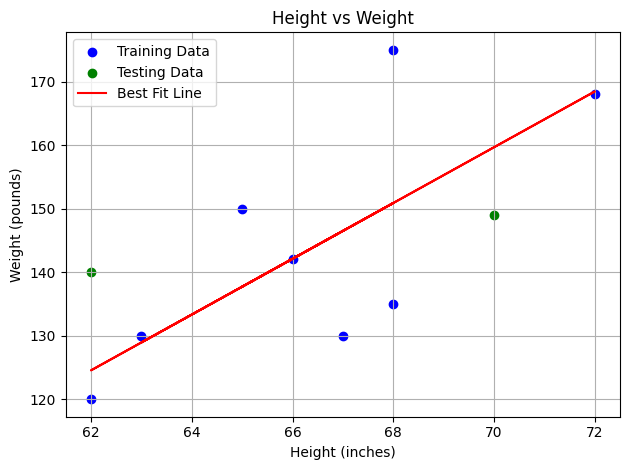

[149 140]


In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([62, 62, 63, 65, 66, 67, 68, 68, 70, 72]).reshape(-1, 1)  # Height in inches
y = np.array([120, 140, 130, 150, 142, 130, 135, 175, 149, 168])  # Weight in pounds

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model using only the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Plot the training data points
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Plot the testing data points
plt.scatter(X_test, y_test, color='green', label='Testing Data')

# Plot the best fit line using the training data
plt.plot(X_train, model.predict(X_train), color='red', label='Best Fit Line')

# Add labels and legend
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Height vs Weight')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
print(y_test)


Calculate Error - MAE

Error for data point 1-

```
y-actual - y-predicted=140-125=15

# This is formatted as code
```
Error for data point 2-

```
y-actual - y-predicted=150-160=-10

# This is formatted as code
```

For a given dataset, we evaluate linear regression model using MAE or MSE

**MAE - Mean Absolute Value**

MAE is calculated by taking the average of the absolute differences between the predicted values and the actual values.


In this case:


```

MAE = (|15|+|-10|)/2
```



**Mean Squared Error (MSE)**

MSE measures the average squared difference between the predicted values and the actual values.

In this case:


```

MSE = ((15)^2+(-10)^2)/2
```

**MAE Vs MSE**

Let's look at the mathmatical notion of both the values-rather I would say drive with me

**MAE**
It treats all errors equally regardless of their size, providing a more balanced view of the model's performance.

It is more robust to outliers compared to MSE

MAE is easier to interpret since it represents the average magnitude of errors in the same units as the target variable.

**MSE**

It penalizes larger errors more than smaller ones because it squares the errors.

MSE is more sensitive to outliers compared to MAE because larger errors contribute more to the overall error.

MSE is not as interpretable as MAE since it represents the average squared error, which may not be in the same units as the target variable.

MSE is useful when you want to penalize larger errors more heavily, such as in cases where small errors are acceptable but large errors are not

Now let's evaluate our model using Python by finding MAE and MSE



In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Given data
X = np.array([62, 62, 63, 65, 66, 67, 68, 68, 70, 72]).reshape(-1, 1)  # Height in inches
y = np.array([120, 140, 130, 150, 142, 130, 135, 175, 149, 168])  # Weight in pounds

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model using only the training data
model = LinearRegression()
model.fit(X_train, y_train)

# # Plot the training data points
# plt.scatter(X_train, y_train, color='blue', label='Training Data')

# # Plot the testing data points
# plt.scatter(X_test, y_test, color='green', label='Testing Data')

# # Plot the best fit line using the training data
# plt.plot(X_train, model.predict(X_train), color='red', label='Best Fit Line')

# # Add labels and legend
# plt.xlabel('Height (inches)')
# plt.ylabel('Weight (pounds)')
# plt.title('Height vs Weight')
# plt.legend()

# # Show plot
# plt.grid(True)
# plt.tight_layout()
# plt.show()
print(y_test)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

[149 140]
Mean Absolute Error (MAE): 13.059928443649369
Mean Squared Error (MSE): 176.30371286574223


**Assignment** - Find MAE and MSE for linear regression model created using salary dataset

# Partial Derivatives

Before we talk about cost function and gradient , we need to do little maths by learning bit about derivatives

Reference Link: [Maths is fun](https://www.mathsisfun.com/calculus/derivatives-partial.html)

So what is derivative ?

The Derivative tells us the slope of a function at any point
let's validate by drawing these lines
one example in linear equation y=2x+3 -> derivative is 2

In equation y=2->slope is 0

for equation which include term like square of x like x^2 - derivative is 2x

This is in accordance with power rule

```
Power Rule:	x^n=	nx^(n−1)
```



# Cost Function and Gradient